<a href="https://colab.research.google.com/github/stk-stk/Applied-Data-Science-Capstone/blob/main/7_Interactive_Dashboard_with_Ploty_Dash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dash plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [2]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

<ipython-input-2-89e3ae8eb04c>:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
<ipython-input-2-89e3ae8eb04c>:5: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


In [9]:


# Read the airline data into pandas dataframe
# spacex_df = pd.read_csv("spacex_launch_dash.csv")
spacex_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='site-dropdown',
                                            options=[
                                                {'label': 'All Sites', 'value': 'ALL'},
                                                {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                                {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                                {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                                {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
                                            ],
                                            value='ALL',
                                            placeholder="place holder here",
                                            searchable=True
                                            ),
                                html.Br(),

                                # Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # Add a slider to select payload range
                                dcc.RangeSlider(id='payload-slider',
                                                min=0, max=10000, step=1000,
                                                marks={0: '0',
                                                       2500: '2500',
                                                       5000: '5000',
                                                       7500: '7500',
                                                       10000: '10000'},
                                                value=[min_payload, max_payload]),
                                # Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    if entered_site == 'ALL':
      fig = px.pie(spacex_df, values='class',
      names='Launch Site',
      title='Total Success Launches By Sites')
      return fig
    else:
      # return the outcomes piechart for a selected site
      filtered_df = spacex_df.loc[(spacex_df['Launch Site']==entered_site), ['Launch Site', 'class']].groupby(by='class', as_index=False).count()
      fig = px.pie(filtered_df, values='Launch Site',
      names='class',
      title='Total Success Launches for Site ' + str(entered_site))
      return fig
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
              [Input(component_id='site-dropdown', component_property='value'),
               Input(component_id="payload-slider", component_property="value")])
def get_scatter_chart(entered_site, payload):
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)'] >= payload[0]) &
                            (spacex_df['Payload Mass (kg)']<= payload[1])]
    if entered_site == 'ALL':
      fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', color='Booster Version Category',
      title='Correlation between Payload and Success for all Sites')
      return fig
    else:
      # return the outcomes piechart for a selected site
      fig = px.scatter(filtered_df[filtered_df['Launch Site']==entered_site],
                        x='Payload Mass (kg)', y='class', color='Booster Version Category',
                      title='Correlation between Payload and Success for Site ' + str(entered_site))
      return fig


# Run the app
if __name__ == '__main__':
    app.run_server()


<IPython.core.display.Javascript object>

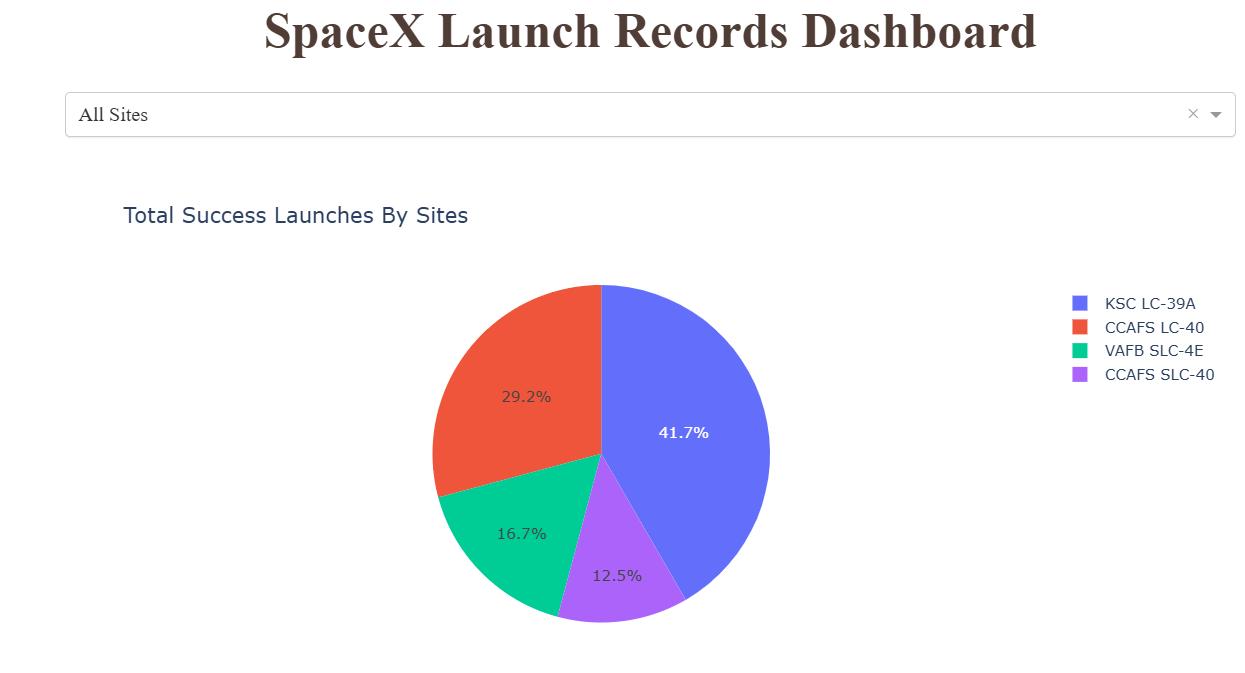

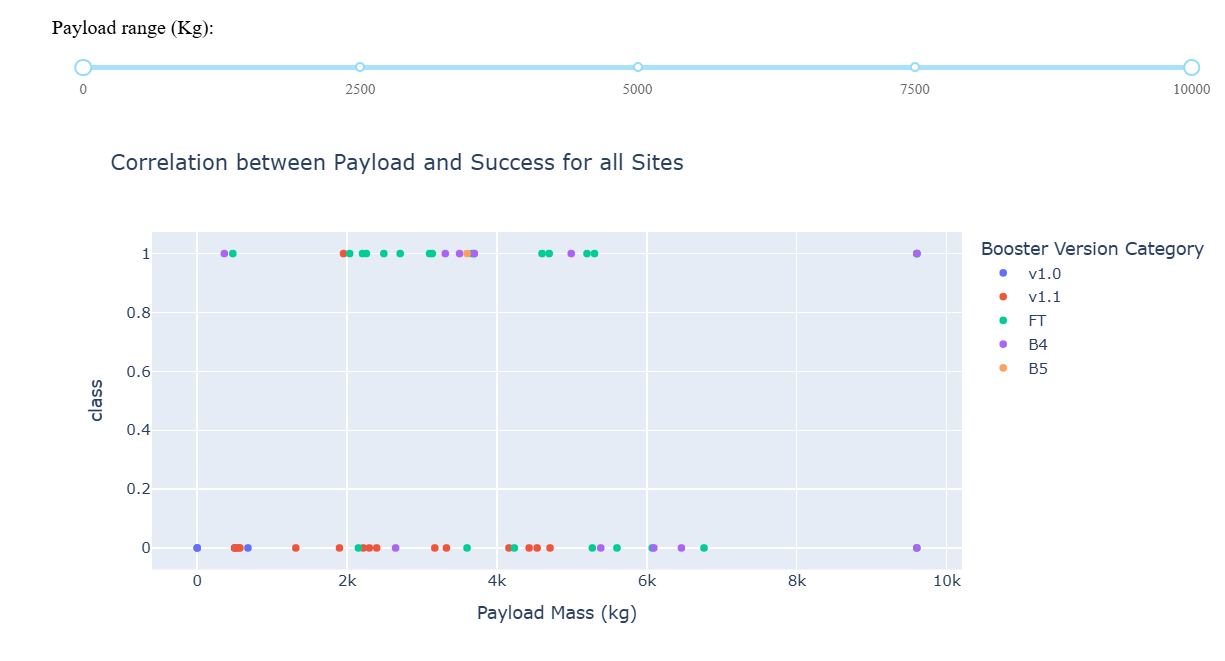